# Introduction

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States.

The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. 

Here, we use the Demographics dataset and reduce its dimensionality by Principal Component Analysis (PCA). Afterwards, we  find the main clusters by KMeans Clustering.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import plotly.express as px

**Getting Data**

In [7]:
df=pd.read_csv('demographic.csv')

In [8]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [9]:
df.shape

(10175, 47)

**Data Cleaning**

*Checking null values & removing unnecessary columns*

In [10]:
df.isnull().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR       0
RIDAGEMN    9502
RIDRETH1       0
RIDRETH3       0
RIDEXMON     362
RIDEXAGM    5962
DMQMILIZ    3914
DMQADFC     9632
DMDBORN4       0
DMDCITZN       4
DMDYRSUS    8267
DMDEDUC3    7372
DMDEDUC2    4406
DMDMARTL    4406
RIDEXPRG    8866
SIALANG        0
SIAPROXY       1
SIAINTRP       0
FIALANG      121
FIAPROXY     121
FIAINTRP     121
MIALANG     2864
MIAPROXY    2863
MIAINTRP    2862
AIALANGA    3858
DMDHHSIZ       0
DMDFMSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGE       0
DMDHRBR4     297
DMDHREDU     294
DMDHRMAR     123
DMDHSEDU    4833
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     133
INDFMIN2     123
INDFMPIR     785
dtype: int64

In [11]:
df.drop(['RIDAGEMN','RIDEXAGM', 'DMQMILIZ', 'DMQADFC','DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2','DMDMARTL','RIDEXPRG','MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA','DMDHSEDU'],axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

SEQN        0
SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
SIALANG     0
SIAPROXY    0
SIAINTRP    0
FIALANG     0
FIAPROXY    0
FIAINTRP    0
DMDHHSIZ    0
DMDFMSIZ    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
DMDHRAGE    0
DMDHRBR4    0
DMDHREDU    0
DMDHRMAR    0
WTINT2YR    0
WTMEC2YR    0
SDMVPSU     0
SDMVSTRA    0
INDHHIN2    0
INDFMIN2    0
INDFMPIR    0
dtype: int64

In [14]:
df.shape

(8756, 33)

## Step 1: Reduce Dimensionality Principal Component Analysis (PCA)

The number of columns is 33, therefore, we will use Principal Component Analysis (PCA) as a dimensionality-reduction technique.

### 1-1-Standardize the data

In [15]:
ss=StandardScaler()

In [16]:
ss.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_df=ss.transform(df)

In [18]:
scaled_df

array([[-1.73269835,  0.        ,  0.        , ..., -0.83360399,
        -0.90957877, -0.87210871],
       [-1.73235782,  0.        ,  0.        , ..., -0.27059498,
        -0.24249847, -0.29492775],
       [-1.7320173 ,  0.        ,  0.        , ...,  0.29241404,
         0.42458183,  1.3813531 ],
       ...,
       [ 1.73112732,  0.        ,  0.        , ..., -0.27059498,
        -0.24249847,  0.85943415],
       [ 1.73146785,  0.        ,  0.        , ..., -0.45826465,
        -0.46485857, -0.74316402],
       [ 1.73180838,  0.        ,  0.        , ...,  1.2307624 ,
         1.53638234,  1.68222402]])

### 1-2- Finding the optimal number of components which capture the greatest amount of variance in the data

we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is 2.

In [20]:
pca=PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.explained_variance_ratio_

array([1.59565788e-01, 1.08537801e-01, 8.26989354e-02, 7.86945801e-02,
       5.05136679e-02, 4.79138456e-02, 4.58843082e-02, 3.89534577e-02,
       3.77063986e-02, 3.45070471e-02, 3.21566080e-02, 3.18643424e-02,
       3.06541188e-02, 2.88252404e-02, 2.83148173e-02, 2.53769559e-02,
       2.43115434e-02, 1.86964655e-02, 1.83067989e-02, 1.67193303e-02,
       1.20148016e-02, 9.80300862e-03, 9.30188316e-03, 8.44834276e-03,
       6.90279533e-03, 6.29507501e-03, 3.67115015e-03, 1.49934185e-03,
       9.56630037e-04, 8.64422034e-04, 4.04986774e-05, 3.14688030e-32,
       8.56327320e-34])

Text(0, 0.5, 'Variance%')

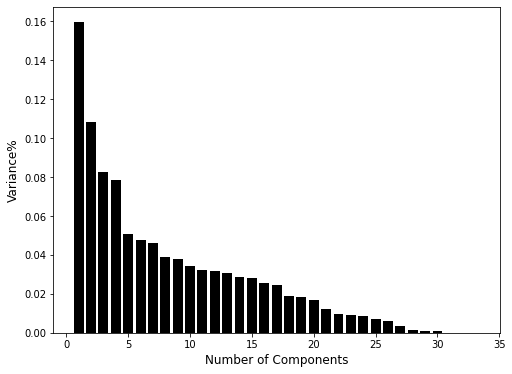

In [29]:
plt.figure(figsize=(8,6))
plt.bar(x=list(range(1,34)), height=pca.explained_variance_ratio_,color='black')
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Variance%',fontsize=12)

There is a variance drop off at Number of components=2, and he first two components explain the majority of the variance in our data. So, we reduce the dimensionality by PCA using only  2 components.

### 1-3- Performing PCA with the chosen number of components

Now we perform PCA with the number of components=2.

In [31]:
pca=PCA(n_components=2)

In [32]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
X_pca=pca.transform(scaled_df)

In [34]:
X_pca

array([[ 1.5378082 ,  2.23177659],
       [ 0.19019525,  0.43844664],
       [ 3.95543737,  0.69058878],
       ...,
       [ 2.09467615,  0.19425095],
       [-1.78903955, -0.51663414],
       [ 0.25647427, -3.42485063]])

Text(0, 0.5, 'Second Principal Component')

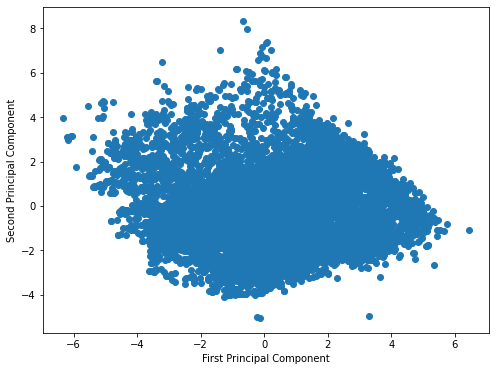

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Step 2: Find the Clusters by KMeans Clustering


### 2-1-Finding the  number of optimal clusters  we’d test


First, however, we must decide how many clustering solutions we’d test.


In [36]:
X=X_pca
inertia=[]
for n in range (1,11):
    model=KMeans( n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model.fit(X)
    inertia.append(model.inertia_)
print(inertia)

[72772.96585226565, 42261.659710170716, 29591.036532403916, 22483.92282799173, 17355.11239309366, 14328.62088389333, 12408.676879908275, 10701.018049072642, 9485.675721172309, 8632.194802771664]


Text(0, 0.5, 'Inertia')

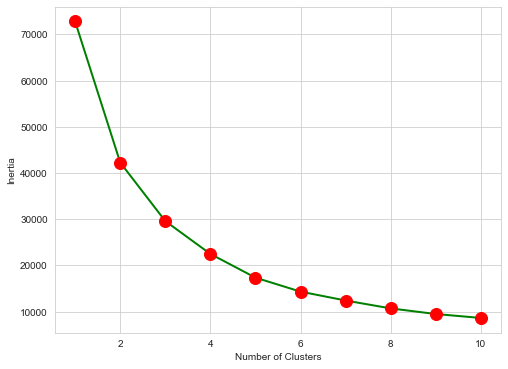

In [37]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,11)), inertia, linewidth=2, markersize=12, color='green', marker='o',markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

### 2-2- Performing clustering with the chosen number of clusters 

In [38]:
model=KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model.fit(X)
labels=model.labels_
centers=model.cluster_centers_

In [39]:
centers

array([[-3.02965964,  2.55855474],
       [ 0.1776978 , -2.32557805],
       [ 1.80771431,  2.33829148],
       [ 3.10743144, -0.60422706],
       [-2.29228258, -0.71077205],
       [ 0.04871595,  0.43143388]])

### 2-3- Visualizing clusters by components

Text(0, 0.5, 'Second Principal Component')

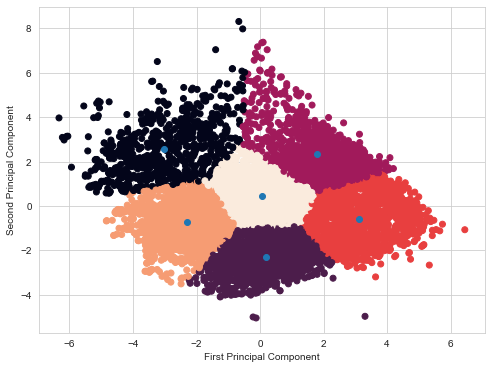

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1],c=labels)
plt.scatter(x=centers[:,0], y=centers[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

The X-axis here is our First Principal Component. The y-axis, on the other hand, is our Second Principal Component 1.

We can now observe the separate clusters.

### 2-4- Adding PCA and K-means Results to DataFrame & Renaming Labels

Before all else, we’ll create a new data frame. It allows us to add in the values of the two principal components to our  data set. In addition, we also append the clusters labels to the new data frame.

In [43]:
df.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,...,DMDHRBR4,DMDHREDU,DMDHRMAR,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,4,4,1.0,1,1.0,...,1.0,3.0,4.0,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,3,3,1.0,1,1.0,...,1.0,3.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78


In [45]:
df.reset_index(inplace=True)

In [48]:
new_df= pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

In [50]:
new_df.shape

(8756, 2)

In [51]:
df.shape

(8756, 35)

In [80]:
co_df= pd.concat([df,new_df],axis=1)

In [81]:
co_df['Cluster Label']=labels 

In [82]:
co_df.head(2)

,level_0,index,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,...,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,Principal Component 1,Principal Component 2,Cluster Label
0,0,0,73557,8,2,1,69,4,4,1.0,...,13281.237386,13481.042095,1,112,4.0,4.0,0.84,1.537808,2.231777,2
1,1,1,73558,8,2,1,54,3,3,1.0,...,23682.057386,24471.769625,1,108,7.0,7.0,1.78,0.190195,0.438447,5


One small step remains: we should add the names of the clusters to the labels.

In [83]:
co_df['Cluster Label']=co_df['Cluster Label'].apply(lambda x:'first' if x==0  else 'second' if x==1 else 'third' if x==2 else 'fourth' if x==3 else 'fifth' if x==4 else 'sixth')

In [84]:
co_df.head(2)

,level_0,index,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,...,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,Principal Component 1,Principal Component 2,Cluster Label
0,0,0,73557,8,2,1,69,4,4,1.0,...,13281.237386,13481.042095,1,112,4.0,4.0,0.84,1.537808,2.231777,third
1,1,1,73558,8,2,1,54,3,3,1.0,...,23682.057386,24471.769625,1,108,7.0,7.0,1.78,0.190195,0.438447,sixth


So, when we further reduced the dimensionality, using PCA, we found out we only need 2 components, and then clustered the data to 6 seperate groups.